In [2]:
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt 

In [3]:
data=pd.read_csv("Downloads\dataset for logistic regression.csv")

In [5]:
data.shape

(14999, 10)

In [6]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [7]:
import seaborn as sb

In [8]:
correlation =data.corr()

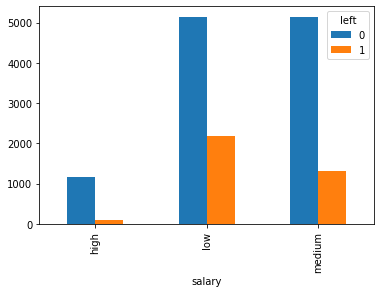

In [18]:
pd.crosstab(data.salary,data.left).plot(kind='bar')
plt.show()

In [20]:
data.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [24]:
x=data[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]

In [25]:
x.head() 

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [26]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [28]:
x.iloc[:,3:4]=LabelEncoder().fit_transform(x.iloc[:,3:4])

C:\Users\Chirag M. Sidhdhapur\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Chirag M. Sidhdhapur\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [29]:
x

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,1
1,0.80,262,0,2
2,0.11,272,0,2
3,0.72,223,0,1
4,0.37,159,0,1
...,...,...,...,...
14994,0.40,151,0,1
14995,0.37,160,0,1
14996,0.37,143,0,1
14997,0.11,280,0,1


In [30]:
x=OneHotEncoder(categorical_features=[3]).fit_transform(x).toarray()

C:\Users\Chirag M. Sidhdhapur\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [33]:
x.shape

(14999, 6)

In [34]:
x=x[:,:5]

In [35]:
x

array([[0.00e+00, 1.00e+00, 0.00e+00, 3.80e-01, 1.57e+02],
       [0.00e+00, 0.00e+00, 1.00e+00, 8.00e-01, 2.62e+02],
       [0.00e+00, 0.00e+00, 1.00e+00, 1.10e-01, 2.72e+02],
       ...,
       [0.00e+00, 1.00e+00, 0.00e+00, 3.70e-01, 1.43e+02],
       [0.00e+00, 1.00e+00, 0.00e+00, 1.10e-01, 2.80e+02],
       [0.00e+00, 1.00e+00, 0.00e+00, 3.70e-01, 1.58e+02]])

In [36]:
y=data.left

In [38]:
y.shape

(14999,)

In [39]:
x.shape

(14999, 5)

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [40]:
from sklearn.linear_model import LogisticRegression

In [45]:
model=LogisticRegression(C=10)

In [46]:
model.fit(x_train,y_train)

C:\Users\Chirag M. Sidhdhapur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
model.score(x_test,y_test)

0.7806666666666666